In [80]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [81]:
vf=pd.read_csv(r'C:\Users\Habibulie\Desktop\MyProject\graduate_admission1.csv')
vf

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524
...,...,...,...,...,...,...,...,...
995,305,120,5,4.4,2.0,3.00,1,0.915
996,293,111,2,2.7,1.7,2.56,1,0.760
997,337,106,1,4.3,2.5,2.79,0,0.583
998,306,105,2,2.0,4.1,3.00,0,0.586


In [82]:
vf.describe(include=['int','float'])
vf

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524
...,...,...,...,...,...,...,...,...
995,305,120,5,4.4,2.0,3.00,1,0.915
996,293,111,2,2.7,1.7,2.56,1,0.760
997,337,106,1,4.3,2.5,2.79,0,0.583
998,306,105,2,2.0,4.1,3.00,0,0.586


In [83]:
vf.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
GPA                  0
Research             0
Chance of Admit      0
dtype: int64

In [84]:
corr=vf.corr(numeric_only=True)['Chance of Admit'].abs().loc[lambda x: x>0.2]
corr

University Rating    0.295981
SOP                  0.206102
LOR                  0.246334
GPA                  0.256385
Research             0.760349
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

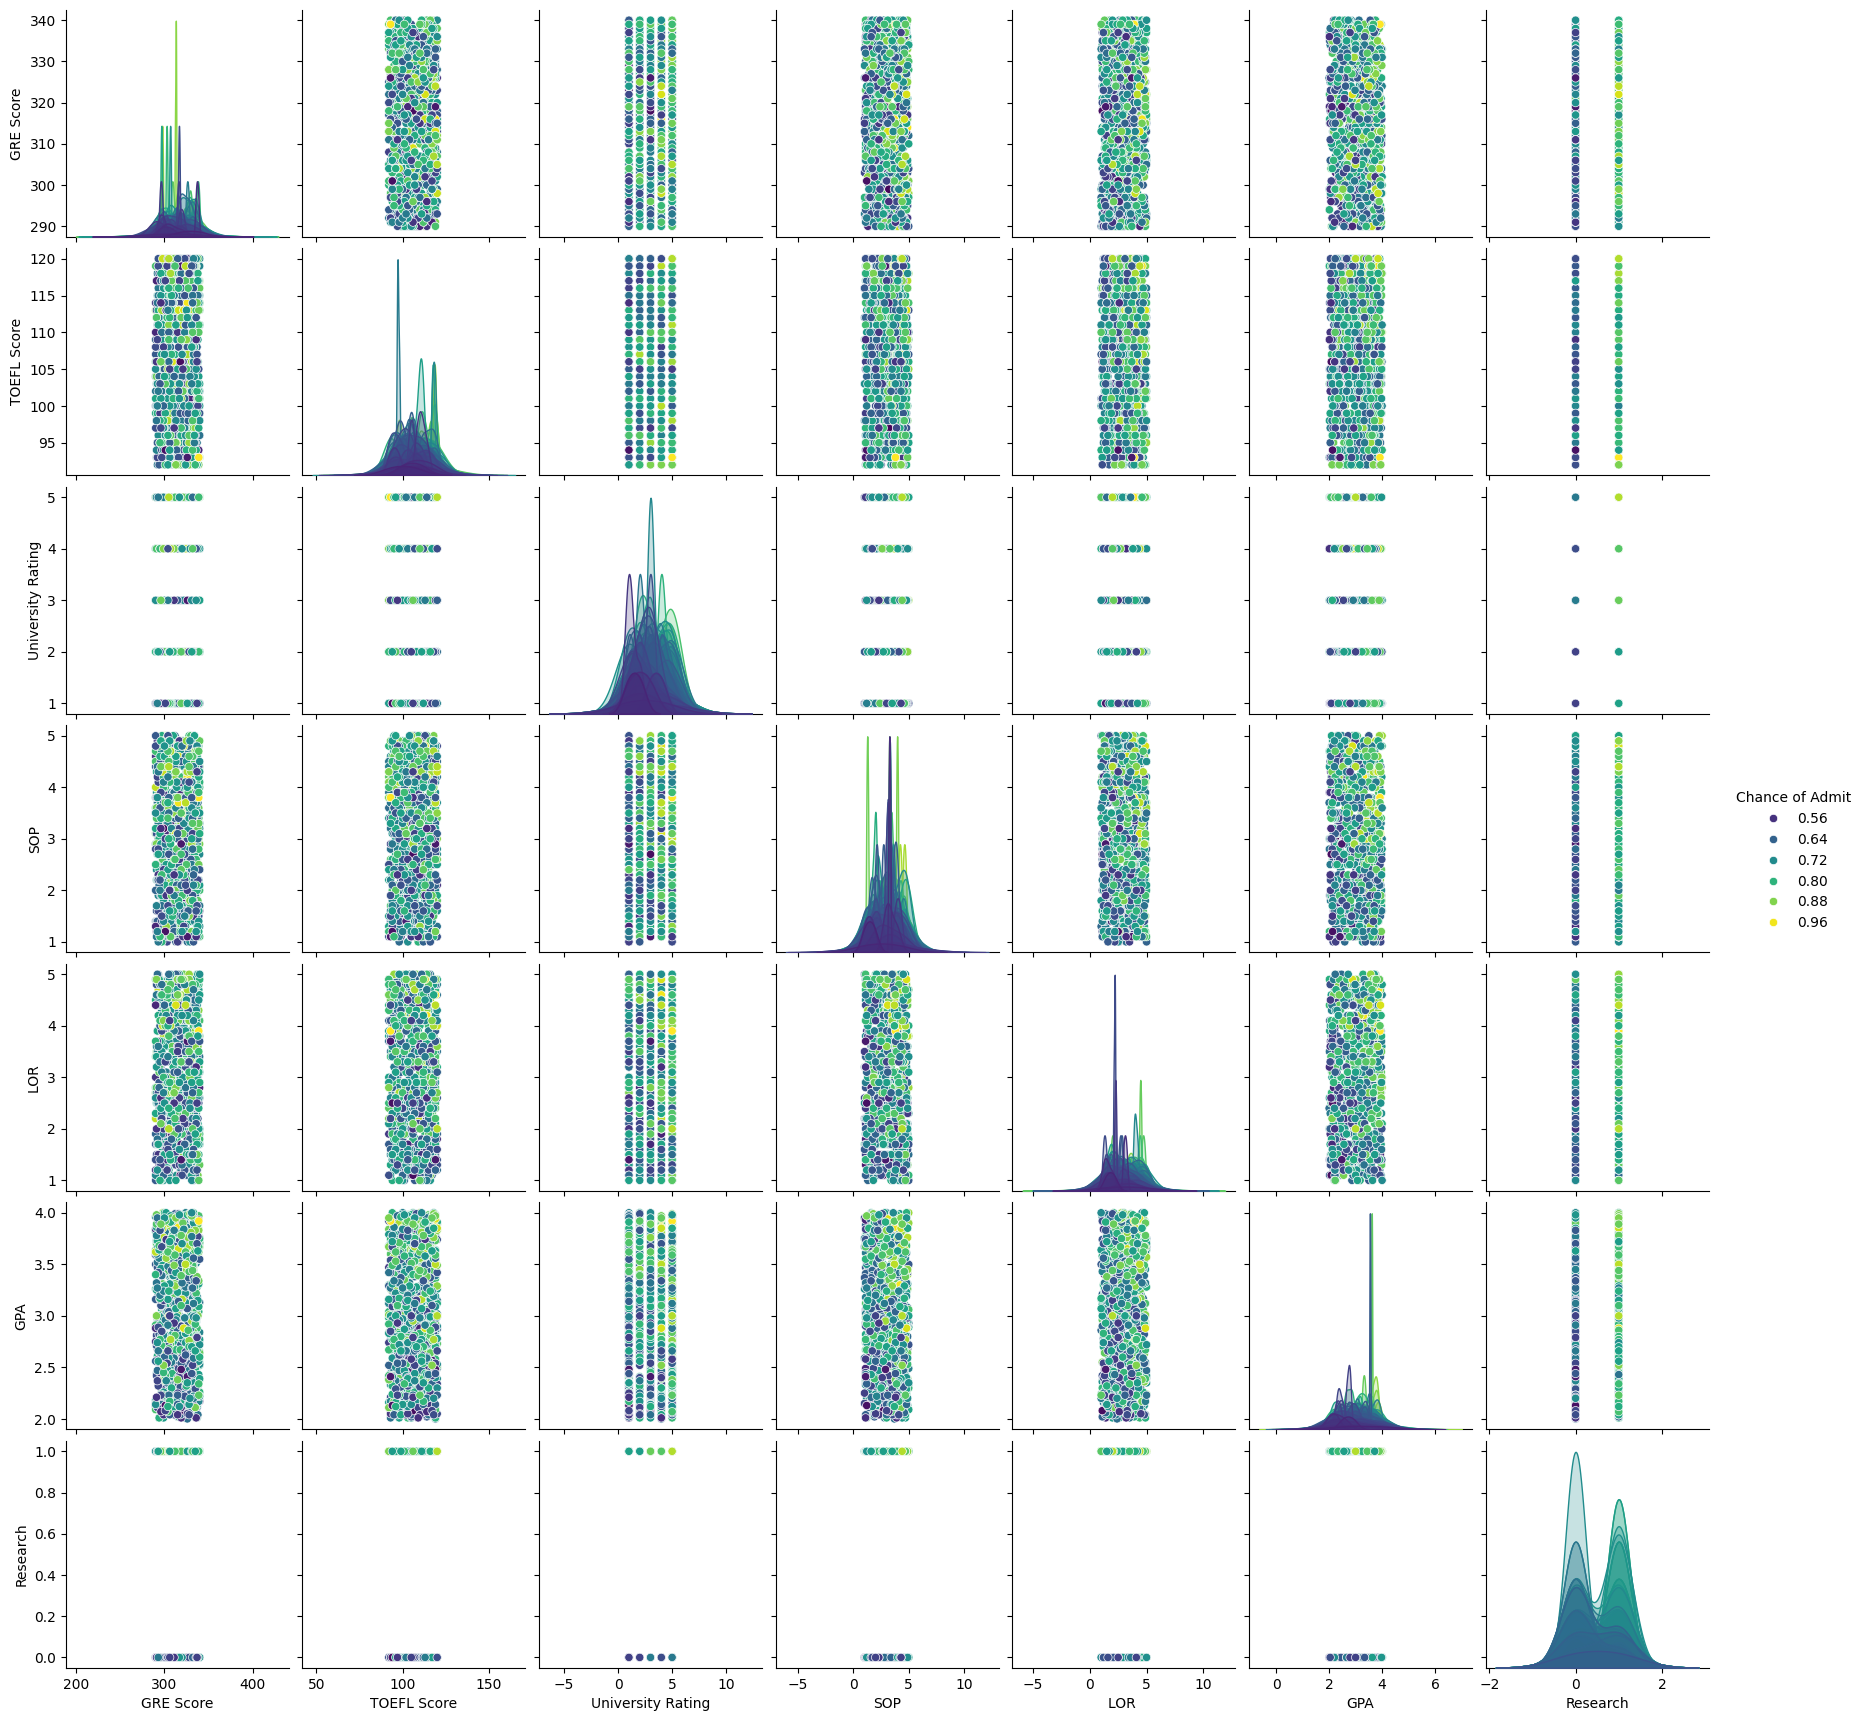

In [85]:
sns.pairplot(vf,hue='Chance of Admit',palette='viridis')

In [86]:
vf.fillna(vf.mean(numeric_only=True),inplace=True)

<Axes: xlabel='GPA', ylabel='Research'>

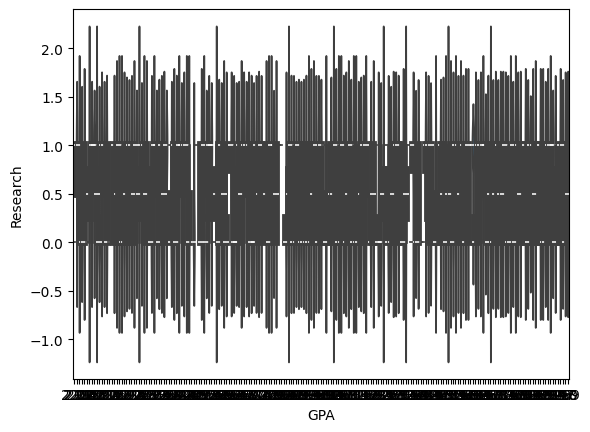

In [87]:
sns.violinplot(data=vf,x='GPA',y='Research')

<Axes: xlabel='GPA', ylabel='University Rating'>

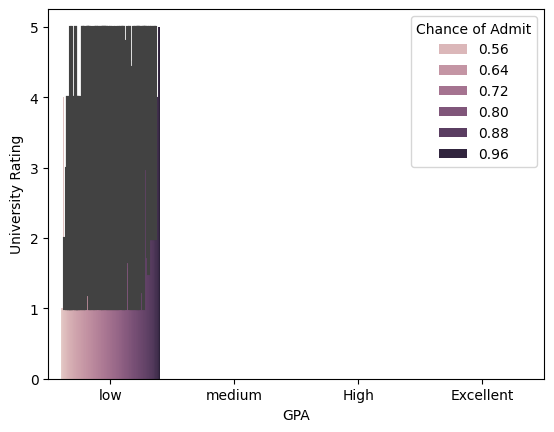

In [88]:
vf['GPA']=pd.cut(vf['GPA'],bins=[0,7,8.5,10,11.5],labels=['low','medium','High','Excellent'])

sns.barplot(data=vf,x='GPA',y='University Rating',hue='Chance of Admit')



<Axes: xlabel='University Rating', ylabel='count'>

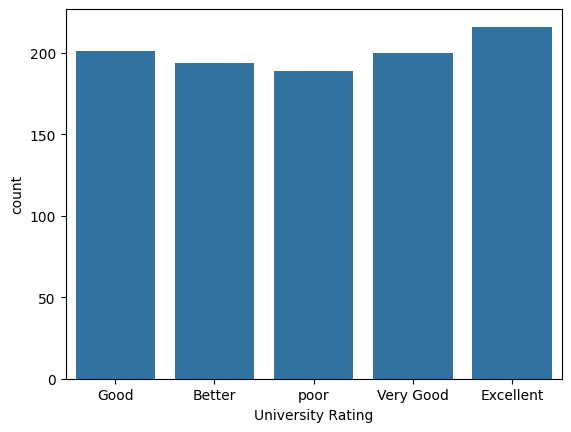

In [90]:
vf['University Rating']=vf['University Rating'].map({
    1:'poor',
    2:'Good',
    3:'Better',
    4:'Very Good',
    5:'Excellent'
})
sns.countplot(data=vf, x='University Rating')

In [102]:
vf['University Rating'].value_counts()

University Rating
Excellent    216
Good         201
Very Good    200
Better       194
poor         189
Name: count, dtype: int64

<Axes: xlabel='TOEFL Score', ylabel='Count'>

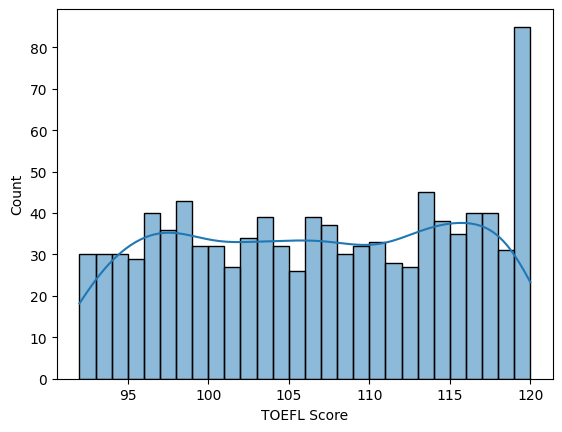

In [92]:
sns.histplot(vf['TOEFL Score'],kde=True,binwidth=1)


<Axes: >

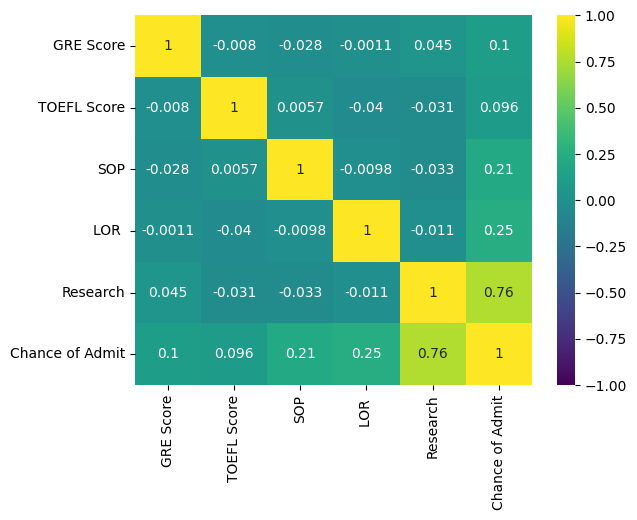

In [93]:
corr=vf.corr(numeric_only=True)
sns.heatmap(corr,annot=True,fmt='.2g',center=0,cmap='viridis',vmin=-1,vmax=1,annot_kws={'fontsize':10,'fontweight':'light'})

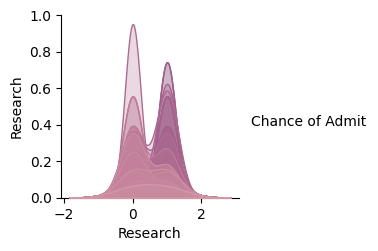

In [94]:
correlated_cols=['Research','Chance of Admit']
sns.pairplot(vf[correlated_cols],hue='Chance of Admit')

In [95]:
vf['Chance of Admit'].value_counts(normalize=True)*100

Chance of Admit
0.728    1.0
0.787    0.9
0.746    0.8
0.623    0.8
0.831    0.8
        ... 
0.590    0.1
0.820    0.1
0.602    0.1
0.861    0.1
0.915    0.1
Name: proportion, Length: 357, dtype: float64

In [110]:
x=vf.drop(columns=['Chance of Admit','GPA'])
y=vf['Chance of Admit']

In [97]:
vf.dtypes

GRE Score               int64
TOEFL Score             int64
University Rating      object
SOP                   float64
LOR                   float64
GPA                  category
Research                int64
Chance of Admit       float64
dtype: object

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
prediction=model.predict(x_test_scaled)
print(f"\n model")
print("MSE:\n",mean_squared_error(y_test,prediction))
print("MAE:\n",mean_absolute_error(y_test,prediction))
print("r2:\n",r2_score(y_test,prediction))


 model
MSE:
 0.0008371237264179229
MAE:
 0.02342139649290671
r2:
 0.9027598383788027


In [ ]:
model=LinearRegression()
scores=cross_val_score(model,x,y,cv=5,scoring='r2')
print('validation of the score:',scores)
print('Average of the score:', np.mean(scores))


validation of the score: [0.7862681  0.78956535 0.80367497 0.83821027 0.82174588]
Average of the score: 0.8078929135233676


In [ ]:
model=LinearRegression()
predict=cross_val_predict(model,x,y,cv=5)
print("\nSummary of predictions:")
print(f"Mean: {np.mean(predict):.4f}")
print(f"Min:  {np.min(predict):.4f}")
print(f"Max:  {np.max(predict):.4f}")
print(f"Std:  {np.std(predict):.4f}")
print(predict[:1])

print(r2_score(y,predict))


Summary of predictions:
Mean: 0.7293
Min:  0.5302
Max:  0.9020
Std:  0.0859
[0.61180819]
0.8106275573083371


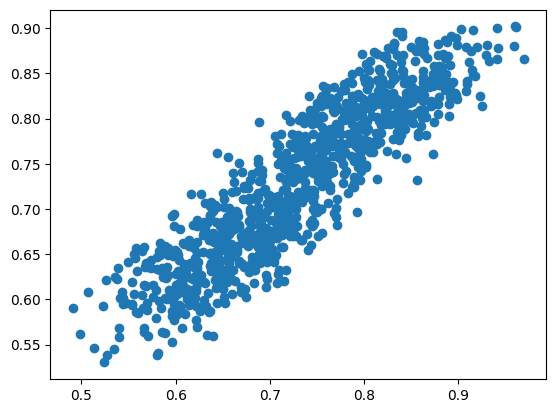

In [ ]:
plt.scatter(y,predict)

In [ ]:
bf=LinearRegression()
bf.fit(x_train_scaled,y_train)
importance=bf.coef_
khaki_df=pd.DataFrame({
    'feature':x.columns,
    'importance': importance
})
khaki_df

,feature,importance
0,GRE Score,0.008305
1,TOEFL Score,0.010324
2,University Rating,0.029357
3,SOP,0.022506
4,LOR,0.024164
5,GPA,0.028238
6,Research,0.076363


In [ ]:
bf=LinearRegression()
bf.fit(x_train_scaled,y_train)
importance=bf.coef_
importance

array([0.00671671, 0.00977886, 0.02951205, 0.02087532, 0.02515568,
       0.0752161 ])

In [ ]:
df=pd.DataFrame({
    'feature':x.columns,
    'importance': importance
})
df

,feature,importance
0,GRE Score,0.006717
1,TOEFL Score,0.009779
2,University Rating,0.029512
3,SOP,0.020875
4,LOR,0.025156
5,Research,0.075216


In [ ]:
cmp=plt.colormaps()
cmp

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'GRE Score'),
  Text(1, 0, 'TOEFL Score'),
  Text(2, 0, 'University Rating'),
  Text(3, 0, 'SOP'),
  Text(4, 0, 'LOR '),
  Text(5, 0, 'GPA'),
  Text(6, 0, 'Research')])

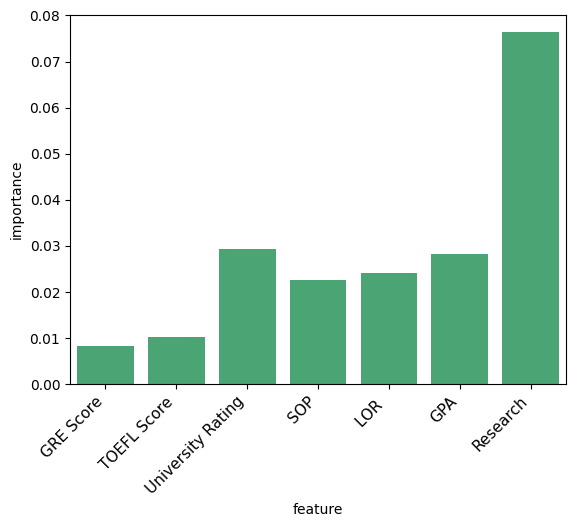

In [ ]:
sns.barplot(data=khaki_df,x='feature',y='importance',color='mediumseagreen')
plt.xticks(rotation=45,ha='right',fontsize=11)